In [1]:
from functools import partial

def multiply(a, b):
    return a * b

double = partial(multiply, 2)
triple = partial(multiply, 3)

#Через partial мы можем делать новую функцию на основе старой, заранее определяя в ней аргументы
#Например тут мы сделали функции, которые умножают на 2 и на 3 соответственно

In [ ]:
from functools import partial

def pretty_print(text, symbol, count):
    print(symbol * count)
    print(text)
    print(symbol * count)

star_pretty_print = partial(pretty_print, 'Hi!!!', symbol='*')

# star_pretty_print(count=7)

print(star_pretty_print.args)       #('Hi!!!',)
print(star_pretty_print.keywords)   #{'symbol': '*'}
print(star_pretty_print.func)       #<function pretty_print at 0x000001CD55DF1760>

# star_pretty_print.func('Исходная функция', symbol='~', count=20)

#Можно получить название исходной функции и её аргументы

('Hi!!!',)
{'symbol': '*'}
<function pretty_print at 0x000001CD55DF1760>


In [ ]:
from functools import partial, update_wrapper

def multiply(a, b):
    '''Функция перемножает два числа и возвращает вычисленное значение.'''
    return a * b

double = partial(multiply, 2)

update_wrapper(double, multiply)   # копируем информацию из функции multiply в partial объект double

print(double.__name__)
print(double.__doc__)


#Добавляем нашей partial функции name и doc

In [10]:
from functools import partial

beegeek = partial(print, sep=', ')

beegeek('beegeek', 'stepik', 'python', sep='-')

beegeek-stepik-python


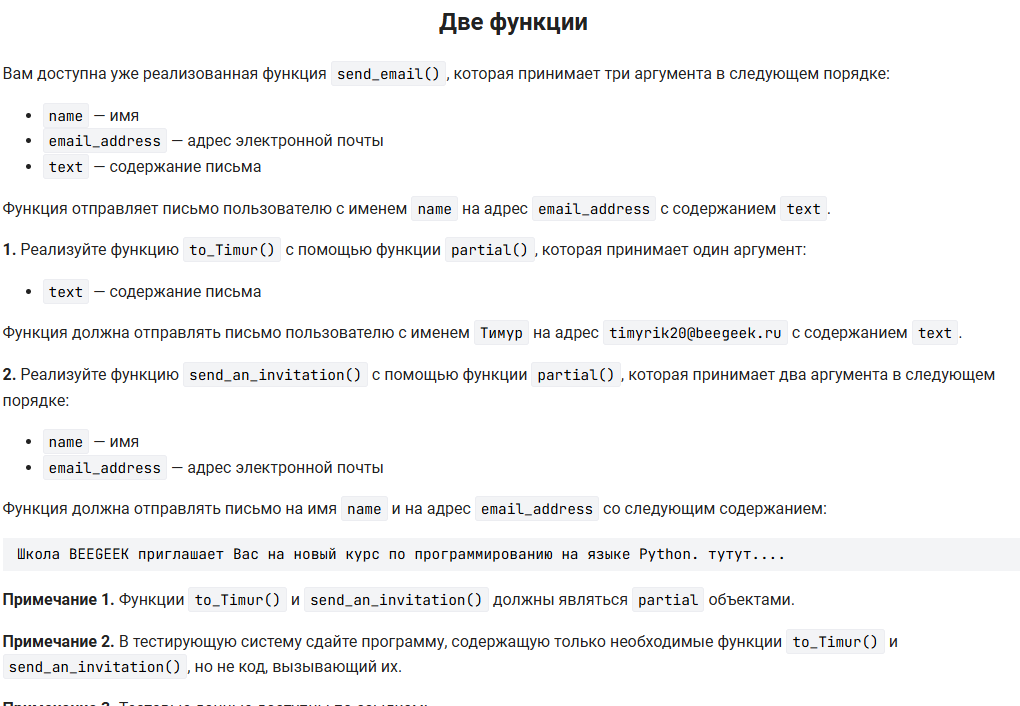

In [17]:


def send_email(name,email_address,text):
    print(f'Получатель:{name},email:{email_address},текст сообщения:{text}')

from functools import partial
send_an_invitation = partial(send_email,text='Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....')
to_Timur = partial(send_email,'Тимур','timyrik20@beegeek.ru')

print(send_an_invitation("Тимур", "timyrik20@beegeek.ru"))
    

Получатель:Тимур,email:timyrik20@beegeek.ru,текст сообщения:Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....
None
